In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd

## bands information

https://gisgeography.com/sentinel-2-bands-combinations/

similar gradient appearing in all bands

=> some normalization help like ndvi


In [2]:
# fp = r'../raw_data/rice_1y/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
# img = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(img.read(i))
    
# print(img.width)
# print(img.height)

## NDVI

In [3]:
# # compute ndvi
# ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))

# show(ndvi)

In [4]:
# ndvi.shape

In [5]:
# np.median(ndvi)

In [6]:
# ndvi_ = np.nan_to_num(ndvi, nan=-1)
# ndvi_values =np.array([x for x in ndvi_.flatten() if x != -1])
# ndvi_values.mean(),ndvi_values.var()

In [7]:
# ndvi_.flatten()

## moisture index

In [8]:
# # moisture index
# mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))

# show(mi)

In [9]:
# mi

# Visualize Data Rice Fields

In [10]:
# fp = r'../raw_data/rice_1y/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
# img = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(img.read(i))
    
# print(img.width)
# print(img.height)


In [11]:
# img.count

In [12]:
# img.read(8)

In [13]:
# array = img.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})

In [14]:
# stats

In [15]:
# import matplotlib.pyplot as plt
# plt.hist(img.read().flatten(), alpha = 1)

In [16]:
# from rasterio.plot import show_hist
# show_hist(img, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

In [17]:
# band4= img.read(4)

In [18]:
# band4.shape

# Visualize SugarCane 

In [19]:
# fp = r'../raw_data/sugarcane/id_6054a1b558a7cd00480009c8_all_bands_2020-07-03.tif'
# sugar_cane = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(sugar_cane.read(i))
    
# print(sugar_cane.width)
# print(sugar_cane.height)

In [20]:
# sugar_cane.count

In [21]:
# array = sugar_cane.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})
# stats

In [22]:
# sugar_cane.read(8).flatten()

In [23]:
# import matplotlib.pyplot as plt
# plt.hist(sugar_cane.read().flatten(), alpha = 1)

In [24]:
# from rasterio.plot import show_hist
# show_hist(sugar_cane, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

# df : Master Dataset

In [25]:
def create_dataset(folders, n = None): 
    X = []
    y = []
    dates =[]
    file_ids = []
    
    for folder in folders:
        files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
        if n is None:
            n = len(files_s)
        for file in files_s[:n]:
            filename = os.path.basename(f"../raw_data/{folder}/{file}")
            file_id, date = filename.split('_all_bands_')
            date = date.replace('.tif','')
    
            img = rasterio.open(file)
            b_dict = {'date':date,'file_id':file_id,'target': folder}
            
            for band in range(1,13):
                b_dict[f'b{band}'] = img.read(band).flatten()
            X.append(b_dict)      
            img.close()
    df = pd.DataFrame(X) 
    return df

In [26]:
folders = ['rice_1y', 'sugarcane']
df = create_dataset(folders) 
df.head()

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ..."
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58..."
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [27]:
def computeNdvi_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    ndvi = (row.b8 - row.b4)/(row.b8 + row.b4)
    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_mean = ndvi_values.mean()
    return ndvi_mean

def computeNdvi_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    ndvi = (row.b8-row.b4)/(row.b8 + row.b4)
    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_median = np.median(ndvi_values)    
    return ndvi_median

def computeNdvi_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    ndvi = (row.b8-row.b4)/(row.b8 + row.b4)
    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_std = np.std(ndvi_values)
    return ndvi_std


df['ndvi_mean']= pd.DataFrame(df.apply(lambda row : computeNdvi_mean(row), axis = 1))
df['ndvi_median']= pd.DataFrame(df.apply(lambda row : computeNdvi_median(row), axis = 1))
df['ndvi_std']= pd.DataFrame(df.apply(lambda row : computeNdvi_std(row), axis = 1))

<ipython-input-27-a3d499c945c9>:4: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8 - row.b4)/(row.b8 + row.b4)
<ipython-input-27-a3d499c945c9>:13: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8-row.b4)/(row.b8 + row.b4)
<ipython-input-27-a3d499c945c9>:22: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8-row.b4)/(row.b8 + row.b4)


In [28]:
# def computeNdvi_median(row):
#     fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
#     img = rasterio.open(fp)
#     ndvi = (row.b8-row.b4)/(row.b8 + row.b4)
#     ndvi_ = np.nan_to_num(ndvi, nan=-1)
#     ndvi_values =np.array([x for x in ndvi_ if x != -1])
#     ndvi_median = np.median(ndvi_values)    
#     return ndvi_median

# df['ndvi_median']= pd.DataFrame(df.apply(lambda row : computeNdvi_median(row), axis = 1))

In [29]:
# def computeNdvi_std(row):
#     fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
#     img = rasterio.open(fp)
#     ndvi = (row.b8-row.b4)/(row.b8 + row.b4)
#     ndvi_ = np.nan_to_num(ndvi, nan=-1)
#     ndvi_values =np.array([x for x in ndvi_ if x != -1])
#     ndvi_std = np.std(ndvi_values)
#     return ndvi_std

# df['ndvi_std']= pd.DataFrame(df.apply(lambda row : computeNdvi_std(row), axis = 1))

In [30]:
def computeMi(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_mean = mi_values.mean()
    return mi_mean

def computeMi_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_median = np.median(mi_values)
    return mi_median

def computeMi_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_median = np.median(mi_values)
    return mi_median

df['mi_mean']= pd.DataFrame(df.apply(lambda row : computeMi(row), axis = 1))
df['mi_median']= pd.DataFrame(df.apply(lambda row : computeMi_median(row), axis = 1))
df['mi_std']= pd.DataFrame(df.apply(lambda row : computeMi_std(row), axis = 1))

<ipython-input-30-1614569191c3>:4: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)
<ipython-input-30-1614569191c3>:13: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)
<ipython-input-30-1614569191c3>:22: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)


In [31]:
def computeCombo1(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)    
    band_combo_1 = row.b7 + row.b6 + row.b4
    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_mean = bc1_values.mean()
    return bc1_mean

def computeCombo1_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_1 = row.b7 + row.b6 + row.b4
    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_median = np.median(bc1_values)
    return bc1_median

def computeCombo1_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_1 = row.b7 + row.b6 + row.b4
    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_std = np.std(bc1_values)
    return bc1_std


df['Cb1_mean']= pd.DataFrame(df.apply(lambda row : computeCombo1(row), axis = 1))
df['Cb1_median']= pd.DataFrame(df.apply(lambda row : computeCombo1_median(row), axis = 1))
df['Cb1_std']= pd.DataFrame(df.apply(lambda row : computeCombo1_std(row), axis = 1))

In [32]:
def computeCombo2_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_mean= bc2_values.mean()
    return bc2_mean

def computeCombo2_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_median= np.median(bc2_values)
    return bc2_median

def computeCombo2_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_std= np.std(bc2_values)
    return bc2_std


df['Cb2_mean']= pd.DataFrame(df.apply(lambda row : computeCombo2_mean(row), axis = 1))
df['Cb2_median']= pd.DataFrame(df.apply(lambda row : computeCombo2_median(row), axis = 1))
df['Cb2_std']= pd.DataFrame(df.apply(lambda row : computeCombo2_std(row), axis = 1))

In [ ]:
def computeCombo3_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_3 = (row.b3-row.b8)/(row.b3 + row.b8)
    bc3_ = np.nan_to_num(band_combo_3, nan=-1)
    bc3_values =np.array([x for x in bc3_.flatten() if x != -1])
    bc3_mean= bc3_values.mean()
    return bc3_mean

def computeCombo3_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_3 = (row.b3-row.b8)/(row.b3 + row.b8)
    bc3_ = np.nan_to_num(band_combo_3, nan=-1)
    bc3_values =np.array([x for x in bc3_.flatten() if x != -1])
    bc3_median= np.median(bc3_values)
    return bc3_median

def computeCombo3_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_3 = (row.b3-row.b8)/(row.b3 + row.b8)
    bc3_ = np.nan_to_num(band_combo_3, nan=-1)
    bc3_values =np.array([x for x in bc3_.flatten() if x != -1])
    bc3_std= np.std(bc3_values)
    return bc3_std


df['Cb3_mean']= pd.DataFrame(df.apply(lambda row : computeCombo3_mean(row), axis = 1))
df['Cb3_median']= pd.DataFrame(df.apply(lambda row : computeCombo3_median(row), axis = 1))
df['Cb3_std']= pd.DataFrame(df.apply(lambda row : computeCombo3_std(row), axis = 1))

In [ ]:
def computeCombo4_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_4 = row.b12 + row.b8 + row.b4
    bc4_ = np.nan_to_num(band_combo_4, nan=-1)
    bc4_values =np.array([x for x in bc4_.flatten() if x != -1])
    bc4_mean= bc4_values.mean()
    return bc4_mean

def computeCombo4_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_4 = row.b12 + row.b8 + row.b4
    bc4_ = np.nan_to_num(band_combo_4, nan=-1)
    bc4_values =np.array([x for x in bc4_.flatten() if x != -1])
    bc4_median= np.median(bc4_values)
    return bc4_median

def computeCombo4_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_4 = row.b12 + row.b8 + row.b4
    bc4_ = np.nan_to_num(band_combo_4, nan=-1)
    bc4_values =np.array([x for x in bc4_.flatten() if x != -1])
    bc4_std= np.std(bc4_values)
    return bc4_std


df['Cb4_mean']= pd.DataFrame(df.apply(lambda row : computeCombo4_mean(row), axis = 1))
df['Cb4_median']= pd.DataFrame(df.apply(lambda row : computeCombo4_median(row), axis = 1))
df['Cb4_std']= pd.DataFrame(df.apply(lambda row : computeCombo4_std(row), axis = 1))

In [ ]:
def computeCombo5_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_5 = row.b4 + row.b3 + row.b2
    bc5_ = np.nan_to_num(band_combo_5, nan=-1)
    bc5_values =np.array([x for x in bc5_.flatten() if x != -1])
    bc5_mean= bc5_values.mean()
    return bc5_mean

def computeCombo5_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_5 = row.b4 + row.b3 + row.b2
    bc5_ = np.nan_to_num(band_combo_5, nan=-1)
    bc5_values =np.array([x for x in bc5_.flatten() if x != -1])
    bc5_median= np.median(bc5_values)
    return bc5_median

def computeCombo5_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    band_combo_5 = row.b4 + row.b3 + row.b2
    bc5_ = np.nan_to_num(band_combo_5, nan=-1)
    bc5_values =np.array([x for x in bc5_.flatten() if x != -1])
    bc5_std= np.std(bc5_values)
    return bc5_std


df['Cb5_mean']= pd.DataFrame(df.apply(lambda row : computeCombo5_mean(row), axis = 1))
df['Cb5_median']= pd.DataFrame(df.apply(lambda row : computeCombo5_median(row), axis = 1))
df['Cb5_std']= pd.DataFrame(df.apply(lambda row : computeCombo5_std(row), axis = 1))

In [33]:
df.head()

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129


# df2 ( drop b1~b12, convert Datatime, Add "month" )

In [34]:
df.keys()

Index(['date', 'file_id', 'target', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7',
       'b8', 'b9', 'b10', 'b11', 'b12', 'ndvi_mean', 'ndvi_median', 'ndvi_std',
       'mi_mean', 'mi_median', 'mi_std', 'Cb1_mean', 'Cb1_median', 'Cb1_std',
       'Cb2_mean', 'Cb2_median', 'Cb2_std'],
      dtype='object')

In [35]:
df2 = df.drop(columns=['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7',\
                       'b8', 'b9', 'b10', 'b11', 'b12'])

In [36]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3312 non-null   datetime64[ns]
 1   file_id      3312 non-null   object        
 2   target       3312 non-null   object        
 3   ndvi_mean    3312 non-null   float64       
 4   ndvi_median  3312 non-null   float64       
 5   ndvi_std     3312 non-null   float64       
 6   mi_mean      3312 non-null   float64       
 7   mi_median    3312 non-null   float64       
 8   mi_std       3312 non-null   float64       
 9   Cb1_mean     3312 non-null   float64       
 10  Cb1_median   3312 non-null   float64       
 11  Cb1_std      3312 non-null   float64       
 12  Cb2_mean     3312 non-null   float64       
 13  Cb2_median   3312 non-null   float64       
 14  Cb2_std      3312 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usa

In [38]:
df2['month'] = pd.DatetimeIndex(df['date']).month
df2.sort_values(by=['month'])
df2

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,month
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,7
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,12
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,7
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,5
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,0.340068,0.345532,0.050042,4.854768,0.090409,0.090409,5681.307479,7805.0,3855.056149,5596.171745,7737.0,3782.037423,6
3308,2020-12-05,id_6054a1b558a7cd00480009b6,sugarcane,0.552570,0.605832,0.132644,1.674060,0.180894,0.180894,3948.891026,5733.0,2871.324692,3738.048077,5539.0,2710.275568,12
3309,2021-02-08,id_6054a1b458a7cd004800099b,sugarcane,0.189564,0.192686,0.014028,9.661381,9.402479,9.402479,5264.416667,6297.0,2446.832065,6517.878788,7930.0,3029.592547,2
3310,2020-09-13,id_6054a1b558a7cd00480009e0,sugarcane,0.235414,0.235495,0.009867,0.398768,0.397854,0.397854,5241.262821,9369.5,4729.225240,4373.288462,7852.0,3945.824889,9


# df3: Data Visualization 
- time seriese

In [39]:
# Sort by month
df3 = df2.copy()
df3

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,month
653,2021-01-15,id_6094f6fdf85c5e001b870a4f,rice_1y,0.295675,0.281454,0.080893,0.158271,0.158295,0.158295,8213.009524,12272.5,6441.462560,7564.104762,11142.0,5954.129170,1
1546,2021-01-25,id_6094f7b0f85c5e001b870a58,rice_1y,0.656829,0.667714,0.046713,0.354806,0.361879,0.361879,6676.743056,9247.5,4538.769031,5652.444444,7828.5,3841.540073,1
1545,2021-01-25,id_6094bb4df85c5e001b870910,rice_1y,0.309981,0.309735,0.028584,0.127613,0.125022,0.125022,5269.424370,0.0,7214.060027,4915.974790,0.0,6732.283418,1
240,2021-01-20,id_60a09545f85c5e001b8714ba,rice_1y,0.827729,0.842331,0.055862,0.301057,0.308356,0.308356,2246.037037,0.0,3675.949237,1872.613169,0.0,3064.537161,1
1670,2021-01-11,id_6054a1b458a7cd004800099b,sugarcane,0.195067,0.197706,0.013086,7.817968,7.604596,7.604596,6896.621212,8428.0,3202.556930,7866.462121,9530.5,3643.409844,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,2020-12-17,id_6054a1b458a7cd00480009a7,sugarcane,0.678923,0.697154,0.079966,0.269696,0.282204,0.282204,5371.795833,7241.0,3180.513797,4560.300000,6065.5,2697.812888,12
3051,2020-12-07,id_6054a1b558a7cd00480009aa,sugarcane,0.720477,0.735354,0.069548,0.364878,0.296359,0.296359,5323.387500,7450.0,3420.450518,4562.695833,6318.5,2934.178341,12
306,2020-12-06,id_60a09200f85c5e001b871496,rice_1y,13.264013,0.018470,18.699421,0.818189,0.827668,0.827668,1663.801242,2691.0,1359.160652,895.070393,1440.0,731.685586,12
3060,2020-12-07,id_6054a1b558a7cd00480009bf,sugarcane,0.713292,0.735795,0.069619,0.301058,0.271313,0.271313,5536.703081,7138.0,3001.348215,4859.722689,6246.0,2629.967703,12


<AxesSubplot:xlabel='date', ylabel='mi_mean'>

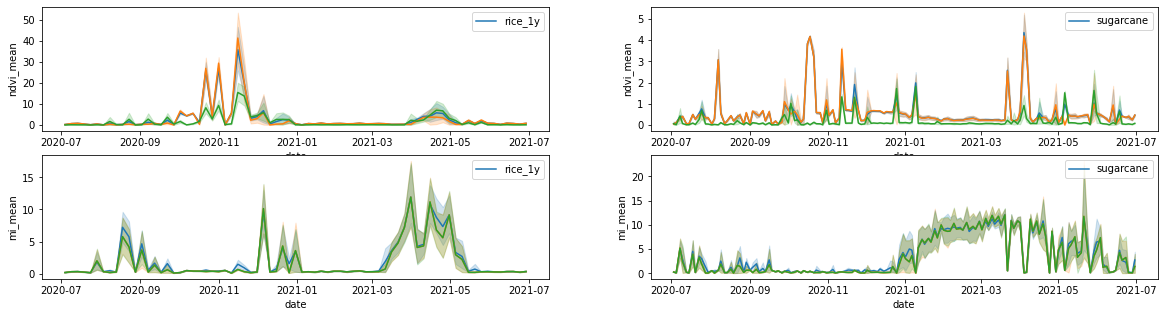

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sugarcane = df3[df3['target']=='sugarcane']
rice = df3[df3['target']== 'rice_1y']

plt.figure(figsize=(20,5))

# Ndvi Visualization
plt.subplot(2, 2, 1)
sns.lineplot(x = "date", y = "ndvi_mean", data = rice, hue ='target')
sns.lineplot(x = "date", y = "ndvi_median", data = rice)
sns.lineplot(x = "date", y = "ndvi_std", data = rice)
plt.subplot(2, 2, 2)
sns.lineplot(x = "date", y = "ndvi_mean", data = sugarcane, hue ='target')
sns.lineplot(x = "date", y = "ndvi_median", data = sugarcane)
sns.lineplot(x = "date", y = "ndvi_std", data = sugarcane)

# mi Visualization
plt.subplot(2, 2, 3)
sns.lineplot(x = "date", y = "mi_mean", data = rice, hue ='target')
sns.lineplot(x = "date", y = "mi_median", data = rice)
sns.lineplot(x = "date", y = "mi_std", data = rice)

plt.subplot(2, 2, 4)
sns.lineplot(x = "date", y = "mi_mean", data = sugarcane, hue ='target')
sns.lineplot(x = "date", y = "mi_median", data = sugarcane)
sns.lineplot(x = "date", y = "mi_std", data = sugarcane)

# Cb1 Visualization

# sns.lineplot(x = "date", y = "Cb1_mean", data = rice, hue = 'target')
# sns.lineplot(x = "date", y = "Cb1_median", data = rice)
# sns.lineplot(x = "date", y = "Cb1_std", data = rice)

# sns.lineplot(x = "date", y = "Cb1_mean", data = sugarcane, hue = 'target')
# sns.lineplot(x = "date", y = "Cb1_median", data = sugarcane)
# sns.lineplot(x = "date", y = "Cb1_std", data = sugarcane)


# Cb2 Visualization

# sns.lineplot(x = "date", y = "Cb2_mean", data = rice, hue = 'target')
# sns.lineplot(x = "date", y = "Cb2_median", data = rice)
# sns.lineplot(x = "date", y = "Cb2_std", data = rice)

# sns.lineplot(x = "date", y = "Cb2_mean", data = sugarcane, hue = 'target')
# sns.lineplot(x = "date", y = "Cb2_median", data = sugarcane)
# sns.lineplot(x = "date", y = "Cb2_std", data = sugarcane)


# plt.ylabel("Col_1 and Col_2")
# plt.xticks(rotation = 25)


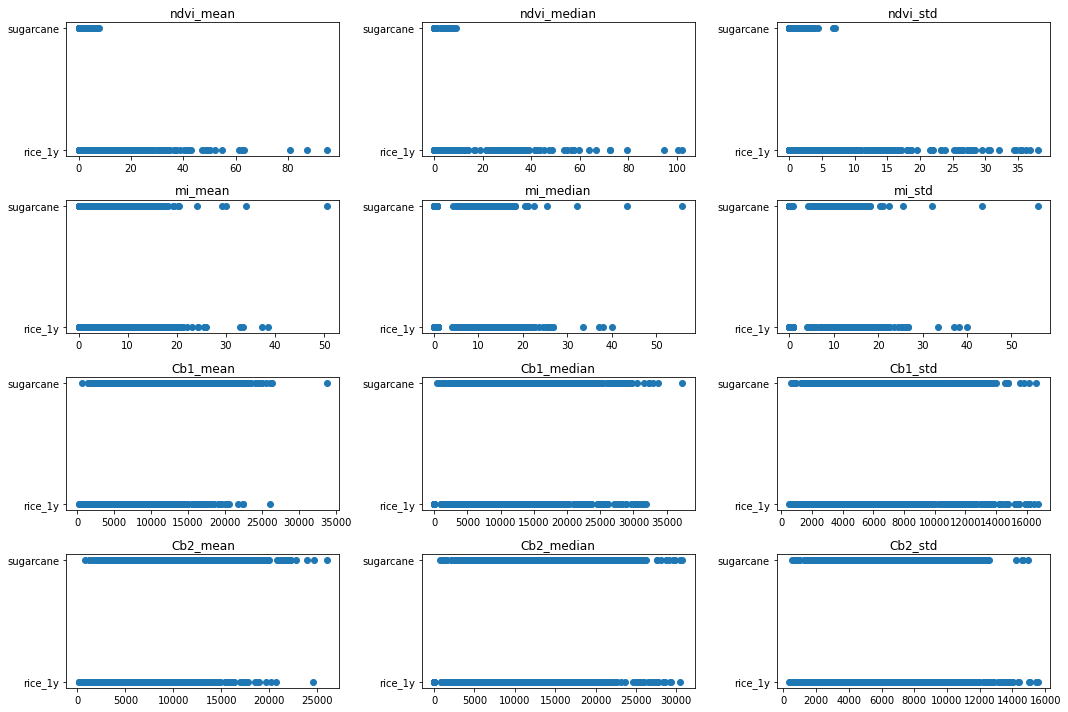

In [44]:
X = df.drop(columns='target')
y = df['target']

fig, ax = plt.subplots(4, 3, figsize=(15,10), tight_layout=True, )

ax[0,0].scatter(X.iloc[:,[14]], y)
ax[0,0].set_title(df.keys()[14+1])
ax[0,1].scatter(X.iloc[:,[15]], y)
ax[0,1].set_title(df.keys()[15+1])
ax[0,2].scatter(X.iloc[:,[16]], y)
ax[0,2].set_title(df.keys()[16+1])

ax[1,0].scatter(X.iloc[:,[17]], y)
ax[1,0].set_title(df.keys()[17+1])
ax[1,1].scatter(X.iloc[:,[18]], y)
ax[1,1].set_title(df.keys()[18+1])
ax[1,2].scatter(X.iloc[:,[19]], y)
ax[1,2].set_title(df.keys()[19+1])

ax[2,0].scatter(X.iloc[:,[20]], y)
ax[2,0].set_title(df.keys()[20+1])
ax[2,1].scatter(X.iloc[:,[21]], y)
ax[2,1].set_title(df.keys()[21+1])
ax[2,2].scatter(X.iloc[:,[22]], y)
ax[2,2].set_title(df.keys()[22+1])

ax[3,0].scatter(X.iloc[:,[23]], y)
ax[3,0].set_title(df.keys()[23+1])
ax[3,1].scatter(X.iloc[:,[24]], y)
ax[3,1].set_title(df.keys()[24+1])
ax[3,2].scatter(X.iloc[:,[25]], y)
ax[3,2].set_title(df.keys()[25+1])

plt.show()

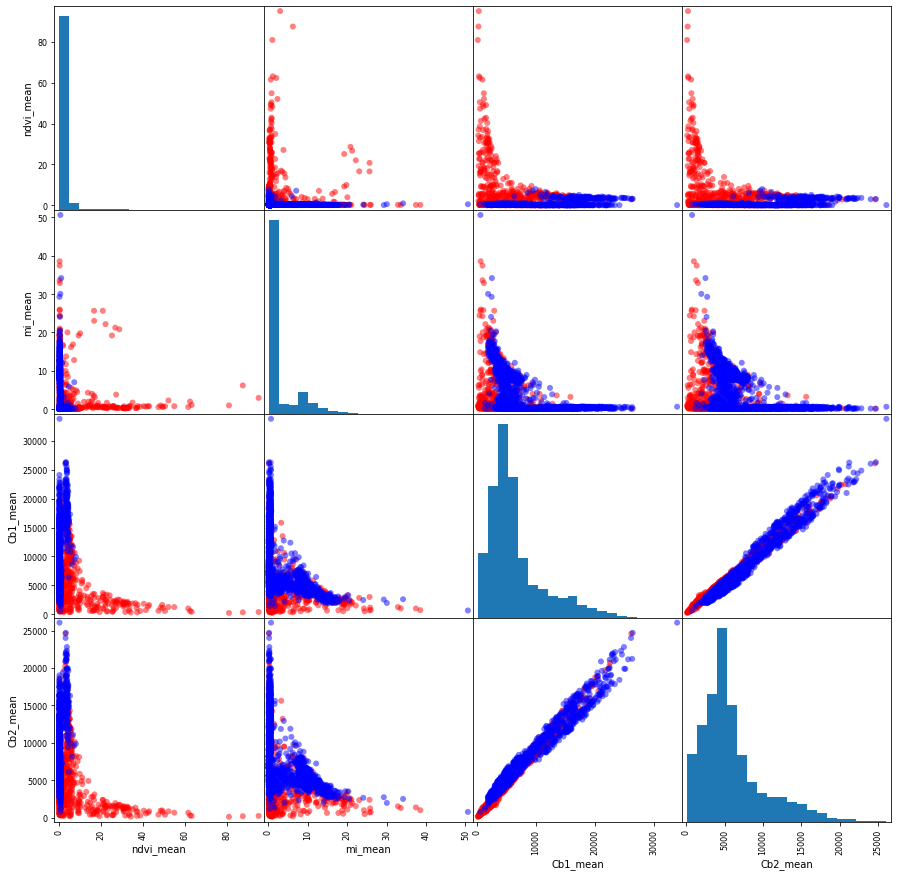

In [45]:
X = df.drop(columns='target')
y = df['target']
pd.plotting.scatter_matrix(X.iloc[:,[14,17,20,23]], alpha=0.5, color=['blue' if t == 'sugarcane' else 'red' for t in y], figsize=(15,15), marker='o', hist_kwds={'bins':20});

# Baseline
- Cross-validation

In [46]:
#Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
X = df.drop(columns='target')
y = df['target']

X = X.iloc[:,[14,15,16,17,18,19,20,21,22,23]]  #'ndvi_mean' ~ 'Cb2_std'
scores = cross_val_score(logreg, X, y, cv=5)
scores.mean()

0.8082701079502217

# Learning Curve

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

In [48]:
X = df.drop(columns='target')
X = X.iloc[:,[14,15,16,17,18,19,20,21,22,23]]  #'ndvi_mean' ~ 'Cb2_std'

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2318, 10), (994, 10), (2318,), (994,))

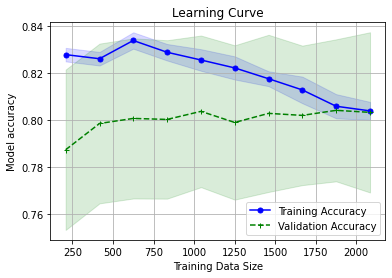

In [50]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Prevent Data Leaking
- Split into train and test data by file_id

In [51]:
# number of unique 'field_id'
len(df3['file_id'].unique())

58

In [52]:
# number of unique: rice vs. sugarcane
len(df3[df3['target']== 'rice_1y']['file_id'].unique()) , len(df3[df3['target']== 'sugarcane']['file_id'].unique())

(23, 35)

In [53]:
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(df3, groups=df3['file_id']))
train = df3.iloc[train_inds]
test = df3.iloc[test_inds]

In [54]:
A = train.file_id.unique()
B = test.file_id.unique()
bool(set(A).intersection(B))

False

# Learning curve w/o data leak

In [63]:
# Cross-val
X_train = train.drop(columns='target')
y_train= train['target']
X_train = X_train.iloc[:,[2,4,5,6,7,8,9,10,11,12,13]]
logreg = LogisticRegression(max_iter=2000)
scores = cross_val_score(logreg, X, y, cv=5)
scores.mean()

0.8007434944237918

In [ ]:
# [Yuki]Going to add Code here
#

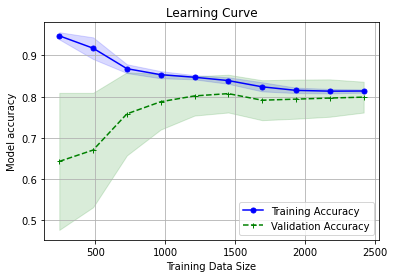

In [64]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# TO DO NEXT
Learning Curve >>might need to fix datset. 
Overfit=too complicated > try models ex.random forest. more data, underfit=too simple> add more features



## PCA - Principal Component Analysis

In [ ]:
# PCA is a statistical technique to convert high dimensional data to low dimensional data by selecting 
# the most important features that capture maximum information about the dataset. The features are selected 
# on the basis of variance that they cause in the output. The feature that causes highest variance is the 
# first principal component. The feature that is responsible for second highest variance is considered the 
# second principal component, and so on. 

# It is important to mention that principal components do not have any correlation with each other.

In [ ]:
# PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature 
# set.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Apply PCA - PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.

# PCA is a 2-step process
# 1. Initialize the PCA class by passing the number of components to the constructor.
# 2. Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.


from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# We did not specify the number of components in the constructor. Hence, all of the features 
# in the feature set will be returned for both the training and test sets.

In [ ]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# The following line of code finds the "explained variance ratio".

explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
# It can be seen that first principal component is responsible for X% variance. Similarly, the second principal 
# component causes Y% variance in the dataset. Collectively we can say that X% + Y% = Z% percent of the 
# classification information contained in the feature set is captured by the first two principal components

# Try to use only the 1st principal component (and so on) to train our algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Now we can try using a random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + accuracy_score(y_test, y_pred))

# It can be seen from the output that with only one feature, the random forest algorithm is able to 
# correctly predict X out of Y total instances, resulting in X% accuracy.

In [ ]:
# Try to use 2 principal components (and so on) to train our algorithm

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + accuracy_score(y_test, y_pred))

In [ ]:
# Results when all features (principal components) are used

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + accuracy_score(y_test, y_pred))

In [ ]:
# From the above analysis, we might find that we can achieve a higher level of accuracy while significantly reducing 
# the number of features in the dataset. It is also pertinent to mention that the accuracy of a classifier 
# doesn't necessarily improve with increased number of principal components.

# The number of principal components to retain in a feature set depends on several conditions such as storage capacity, 
# training time, performance, etc. In some dataset all the features are contributing equally to the overall variance, 
# therefore all the principal components are crucial to the predictions and none can be ignored. A general rule of 
# thumb is to take number of principal of principal components that contribute to significant variance and ignore those 
# with diminishing variance returns.
